## Análisis de calidad de productos vendidos

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
% matplotlib inline

In [3]:
# Cargo las columnas que necesito
datos = pd.read_csv('/home/lautaro/Desktop/events.csv', usecols = lambda col: col in ["timestamp", "event", "condition"])
# Filtro por evento para mostrar unicamente las ventas
ventas = datos.loc[datos["event"] == "conversion", ["timestamp", "condition"]]

In [4]:
ventas["cantidad"] = 1

In [5]:
print(ventas.groupby("condition", as_index=False).sum())

            condition  cantidad
0                 Bom       538
1  Bom - Sem Touch ID        22
2           Excelente       258
3           Muito Bom       352
4                Novo         2


In [6]:
ventas = ventas.loc[ventas["condition"].isin(["Bom", "Muito Bom", "Excelente"]), :]

In [8]:
ventas_totales = ventas.loc[:,["condition","cantidad"]]
ventas_totales = ventas_totales.groupby("condition",as_index=False).sum()

In [9]:
print ventas_totales

   condition  cantidad
0        Bom       538
1  Excelente       258
2  Muito Bom       352


(-1.25, 1.25, -1.25, 1.25)

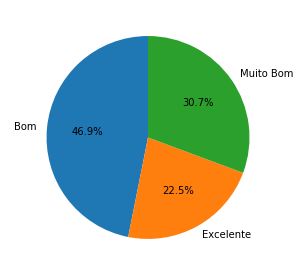

In [24]:
ventas_totales.plot(kind="pie",y="cantidad",autopct='%1.1f%%', ax=plt.subplot(121, aspect='equal'),
 startangle=90, shadow=False, labels=ventas_totales["condition"], legend = False, figsize=(10,10))

plt.axis("off")

Como podemos observar, a menor "calidad" del producto mayores son las ventas. Los motivos pueden ser varios, por ejemplo pueden llegar a preferir comprar el producto completamente nuevo a comprar uno en estado "excelente". También hay que tener en cuenta que se trata de un sitio que vende celulares usuarios por lo que la gente que ingresa al sitio esta previamente dispuesta a sacrificar un poco de calidad por un mejor precio.